# Proyek Analisis Data: Nama dataset
- Nama: Christian Arvianus Nathanael Biran
- Email: nathanaelbiran@gmail.com
- Id Dicoding: nathanael_biran

## Menentukan Pertanyaan Bisnis

- Kapan periode peminjaman sepeda tertinggi ?
- Bagaimana perbandingan peminjaman sepeda tiap musim dan cuacanya ?

## Menyaipkan semua library yang dibuthkan

In [6]:
!pip install streamlit

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/drive')

## Data Wrangling

### Gathering Data

In [8]:
# filepath = "/content/drive/MyDrive/Dummy/Bike-sharing-dataset/day.csv"

In [9]:
# df = pd.read_csv(filepath)
df = pd.read_csv('day.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# Mengganti data season dengan nama musim
df["season"] = df["season"].replace({1: "springer", 2: "summer", 3: "fall", 4: "winter"})

# Mengganti data workingday dengan Ya/Tidak
df["workingday"] = df["workingday"].replace({0: "No", 1: "Yes"})

# Mengganti data holiday dengan Ya/Tidak
df["holiday"] = df["holiday"].replace({0: "No", 1: "Yes"})

# Mengganti data yr dengan tahun
df["yr"] = df["yr"].replace({0: "2011", 1: "2012"}).astype("str")

# Mengganti data mnth dengan nama bulan
bulan = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}
df["mnth"] = df["mnth"].map(bulan)

# Mengubah tipe data weathersit menjadi kategori
df["weathersit"] = df["weathersit"].astype("category")


### Assessing Data

In [11]:
#missing value
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# invalid value
for i in df.keys():
  print(i, ":", df[i].nunique()) #sesuai dengan deskripsi dataset

instant : 731
dteday : 731
season : 4
yr : 2
mnth : 12
holiday : 2
weekday : 7
workingday : 2
weathersit : 3
temp : 499
atemp : 690
hum : 595
windspeed : 650
casual : 606
registered : 679
cnt : 696


In [13]:
# duplicated data
df.duplicated().sum()

0

### Cleaning Data

In [14]:
# datanya aman

## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Eksplorasi Parameter Statistik
df.describe()

,instant,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.997264,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,2.004787,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,5.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,6.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
monthly_report = df.groupby(by=["yr", "mnth"]).agg({
    "registered" : 'sum',
    "casual" : "sum",
      "cnt" : "sum",
})
monthly_report

registered  casual     cnt
yr   mnth                                 
2011 Agustus        107849   28842  136691
     April           72524   22346   94870
     Desember        78875    8448   87323
     Februari        41973    6242   48215
     Januari         35116    3073   38189
     Juli           104889   36452  141341
     Juni           112900   30612  143512
     Maret           51219   12826   64045
     Mei            104771   31050  135821
     November        86573   15594  102167
     Oktober         98289   25222  123511
     September      100873   26545  127418
2012 Agustus        171306   43197  214503
     April          135768   38456  174224
     Desember       110468   13245  123713
     Februari        94416    8721  103137
     Januari         87775    8969   96744
     Juli           161902   41705  203607
     Juni           159536   43294  202830
     Maret          133257   31618  164875
     Mei            151630   44235  195865
     November       131655   21009  152664
     Oktober        164303   34538  198841
     September      174795   43778  218573

In [17]:
pivot_table = df.pivot_table(values="cnt", index="season", columns="weathersit", aggfunc="mean")
pivot_table

weathersit,1,2,3
season,,,
fall,5878.257353,5222.479167,2751.75
springer,2811.135135,2357.166667,934.75
summer,5548.548673,4236.705882,1169.00
winter,5043.563107,4654.000000,1961.60


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [18]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [19]:
yr2011 = df[df["yr"]=="2011"]
yr2012 = df[df["yr"]=="2012"]

In [20]:
gbm2012 = yr2012.groupby(by=["mnth"])["cnt"].sum()
gbm2011 = yr2011.groupby(by=["mnth"])["cnt"].sum()
# Set month order
month_order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

In [21]:
# Sort dataframe by month order
gbm2012 = gbm2012.loc[month_order]
gbm2012

mnth
Januari       96744
Februari     103137
Maret        164875
April        174224
Mei          195865
Juni         202830
Juli         203607
Agustus      214503
September    218573
Oktober      198841
November     152664
Desember     123713
Name: cnt, dtype: int64

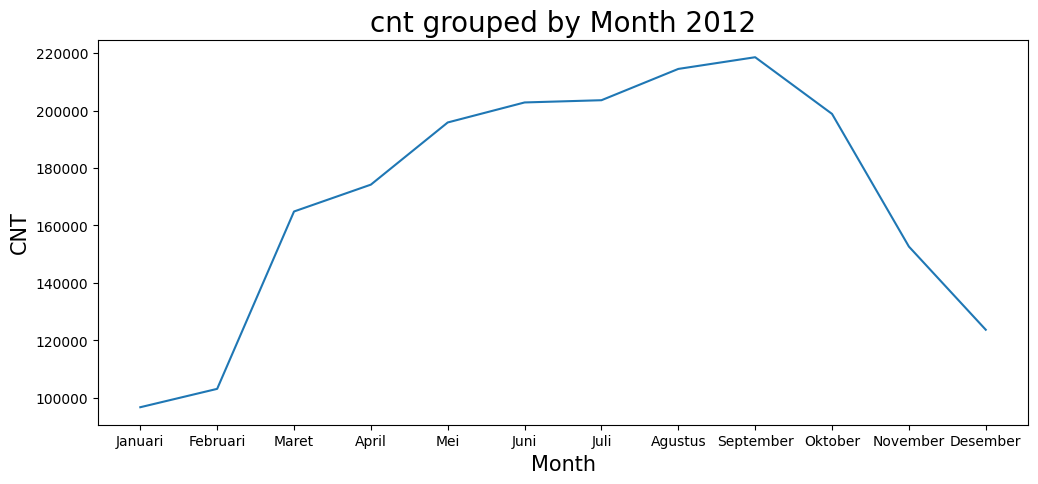

In [22]:
plt.figure(figsize=(12, 5))
sns.lineplot(gbm2012)
plt.title('cnt grouped by Month 2012', size=20)
plt.xlabel('Month',size=15)
plt.ylabel('CNT',size=15)
plt.show();

In [23]:
gbm2011 = gbm2011.loc[month_order]
gbm2011

mnth
Januari       38189
Februari      48215
Maret         64045
April         94870
Mei          135821
Juni         143512
Juli         141341
Agustus      136691
September    127418
Oktober      123511
November     102167
Desember      87323
Name: cnt, dtype: int64

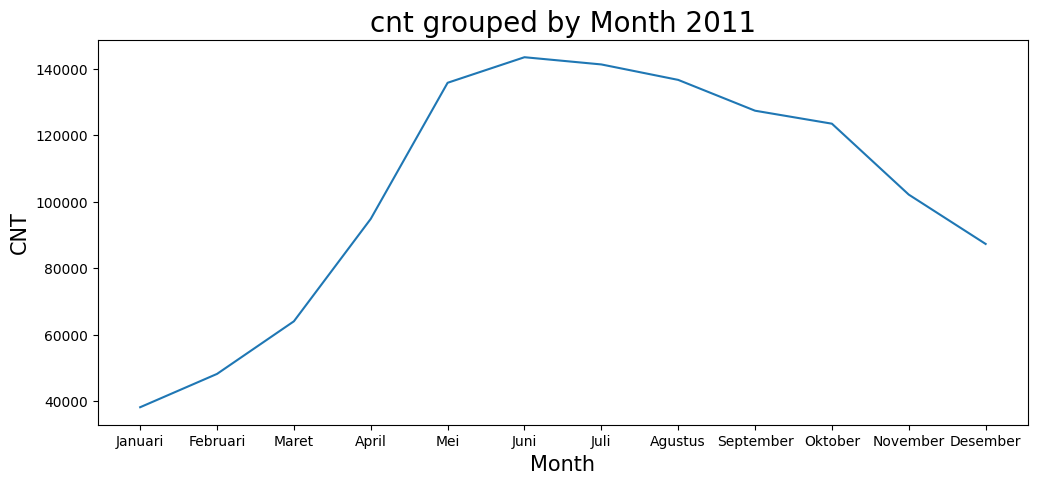

In [24]:
plt.figure(figsize=(12, 5))
sns.lineplot(gbm2011)
plt.title('cnt grouped by Month 2011', size=20)
plt.xlabel('Month',size=15)
plt.ylabel('CNT',size=15)
plt.show();

In [25]:
yr2011.groupby(by=["season", "mnth"]).agg({
    "cnt" : ["sum", "mean"]
})

cnt             
                       sum         mean
season   mnth                          
fall     Agustus    136691  4409.387097
         Juli       141341  4559.387097
         Juni        49726  4972.600000
         September   91892  4176.909091
springer Desember    22390  2035.454545
         Februari    48215  1721.964286
         Januari     38189  1231.903226
         Maret       41206  2060.300000
summer   April       94870  3162.333333
         Juni        93786  4689.300000
         Maret       22839  2076.272727
         Mei        135821  4381.322581
winter   Desember    64933  3246.650000
         November   102167  3405.566667
         Oktober    123511  3984.225806
         September   35526  4440.750000

In [26]:
yr2012.groupby(by=["season", "mnth"]).agg({
    "cnt" : ["sum", "mean"]
})

cnt             
                       sum         mean
season   mnth                          
fall     Agustus    214503  6919.451613
         Juli       203607  6567.967742
         Juni        65662  6566.200000
         September  157707  7168.500000
springer Desember    20608  1873.454545
         Februari   103137  3556.448276
         Januari     96744  3120.774194
         Maret      100859  5042.950000
summer   April      174224  5807.466667
         Juni       137168  6858.400000
         Maret       64016  5819.636364
         Mei        195865  6318.225806
winter   Desember   103105  5155.250000
         November   152664  5088.800000
         Oktober    198841  6414.225806
         September   60866  7608.250000

### Pertanyaan 2:

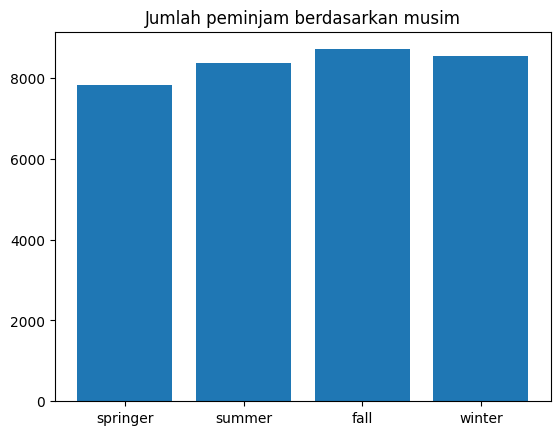

In [27]:
plt.bar(x=df.season, height=df.cnt)
plt.title("Jumlah peminjam berdasarkan musim")
plt.show()

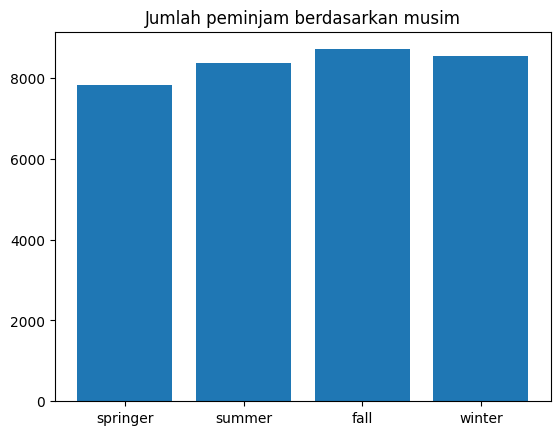

In [28]:
plt.bar(x=df.season, height=df.cnt)
plt.title("Jumlah peminjam berdasarkan musim")
plt.show()

C:\Users\Dell Latitude 7280\AppData\Local\Temp\ipykernel_1740\3552460247.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="season", y="cnt", hue="weathersit", ci=None);


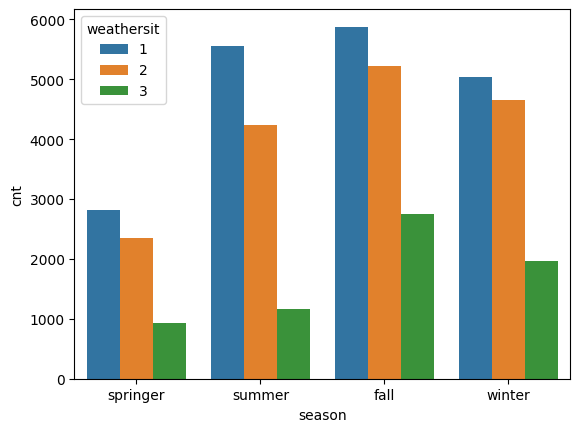

In [29]:
sns.barplot(data=df, x="season", y="cnt", hue="weathersit", ci=None);

## Conclusion

- Peminjaman tertinggi ada di bulan 4/2012 hingga 10/2012. dapat dilihat ada penigkatan pada tahun 2012
- Jumlah peminjaman sepeda paling tinggi berada di musim gugur dengan kondisi cuaca 1 dan paling rendah pada musim semi dengan kondisi cuaca 3

In [30]:
gbm2011.to_csv('gbm2011.csv', index=False)
gbm2012.to_csv('gbm2012.csv', index=False)
df.to_csv('df.csv', index=False)